# TENSORFLOW IMPLEMENTATION

# MODEL 1

**Part 1: Data collection**

In [0]:
import tensorflow as tf

In [0]:
from tensorflow.examples.tutorials.mnist import input_data

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

**Part 2: Defining the model**

**Defining layers**

In [0]:
n_hidden1 = 1024
n_hidden2 = 512
n_input = 784
n_classes = 10

**placeholder for input and output**

In [0]:
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])

keep_prob = tf.placeholder(tf.float32)
keep_prob_input = tf.placeholder(tf.float32)

**weights initialisation**

In [0]:
weights_relu = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden1],stddev=0.050, mean=0)),    #784x512
    'h2': tf.Variable(tf.random_normal([n_hidden1, n_hidden2],stddev=0.062, mean=0)), #512x128
    'out': tf.Variable(tf.random_normal([n_hidden2, n_classes],stddev=0.120, mean=0))  #128x10
}

Instructions for updating:
Colocations handled automatically by placer.


**biases initialisation**

In [0]:
biases = {
    "b1": tf.Variable(tf.random_normal(shape=[n_hidden1])),
    "b2": tf.Variable(tf.random_normal(shape=[n_hidden2])),
    "out": tf.Variable(tf.random_normal(shape=[n_classes]))
}

**Training parameters**

In [0]:
training_epochs = 5
learning_rate = 0.001
batch_size = 100
display_step = 1
epsilon = 1e-3

**Our model: 784-1024-512-10**

In [0]:
def multi_layer_perceptron(x, weights, biases):
  
  layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
  
  batch_mean_1, batch_var_1 = tf.nn.moments(layer_1,[0])
  scale_1 = tf.Variable(tf.ones([n_hidden1]))
  beta_1 = tf.Variable(tf.zeros([n_hidden1]))
  layer_1 = tf.nn.batch_normalization(layer_1, batch_mean_1, batch_var_1, beta_1, scale_1, epsilon)
  layer_1 = tf.nn.sigmoid(layer_1)
  layer_1_drop = tf.nn.dropout(layer_1, keep_prob)
  
  layer_2 = tf.add(tf.matmul(layer_1_drop, weights['h2']), biases['b2'])
  
  batch_mean_2, batch_var_2 = tf.nn.moments(layer_2,[0])
  scale_2 = tf.Variable(tf.ones([n_hidden2]))
  beta_2 = tf.Variable(tf.zeros([n_hidden2]))
  layer_2 = tf.nn.batch_normalization(layer_2,batch_mean_2,batch_var_2,beta_2,scale_2,epsilon)
  layer_2 = tf.nn.sigmoid(layer_2)
  layer_2_drop = tf.nn.dropout(layer_2, keep_prob)
  
  out_layer = tf.add(tf.matmul(layer_2_drop, weights['out']), biases['out'])
  out_layer = tf.nn.sigmoid(out_layer)
  
  return out_layer

**Model - ADAM**

In [0]:
# %matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time

def plt_dynamic(x, y, y_1, ax, ticks,title, colors=['b']):
    ax.plot(x, y, 'b', label="Train Loss")
    ax.plot(x, y_1, 'r', label="Test Loss")
    if len(x)==1:
        plt.legend()
        plt.title(title)
    plt.yticks(ticks)
    fig.canvas.draw()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

train_avg_cost 2.3605736953561953
Epoch: 0001 train cost=2.360573695 test cost=2.364476983
train_avg_cost 2.3603043161738992
Epoch: 0002 train cost=2.360304316 test cost=2.364417389
train_avg_cost 2.359170761975373
Epoch: 0003 train cost=2.359170762 test cost=2.364323669
train_avg_cost 2.3603117656707773
Epoch: 0004 train cost=2.360311766 test cost=2.364303958
train_avg_cost 2.359598089131443
Epoch: 0005 train cost=2.359598089 test cost=2.364389441
Accuracy: 0.0914


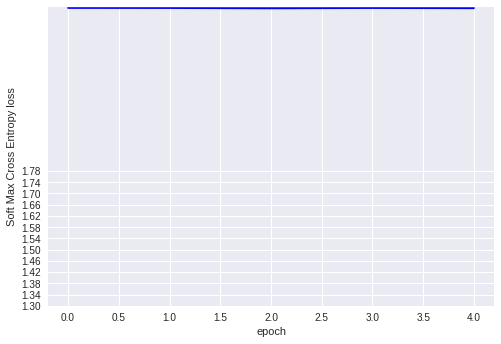

In [0]:
y_sgd = multi_layer_perceptron(x, weights_relu, biases)
cost_sgd = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_sgd, labels = y_))
# optimizer_adam = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost_sgd)

with tf.Session() as sess:
  tf.global_variables_initializer().run()
  fig,ax = plt.subplots(1,1)
  ax.set_xlabel('epoch')
  ax.set_ylabel('Soft Max Cross Entropy loss')
  xs, ytrs, ytes = [], [], []
  for epoch in range(training_epochs):
      train_avg_cost = 0.
      test_avg_cost = 0.
      total_batch = int(mnist.train.num_examples/batch_size)

        # Loop over all batches
      for i in range(total_batch):
          batch_xs, batch_ys = mnist.train.next_batch(batch_size)
          c, w = sess.run([cost_sgd, weights_relu], feed_dict={x: batch_xs, y_: batch_ys, keep_prob: 0.5})
#           print('cost is ',c)
          train_avg_cost += c / total_batch
          c = sess.run(cost_sgd, feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_prob: 0.5})
          test_avg_cost += c / total_batch
      print('train_avg_cost',train_avg_cost)

      xs.append(epoch)
      ytrs.append(train_avg_cost)
      ytes.append(test_avg_cost)
#       plt_dynamic(xs, ytrs, ytes, ax, np.arange(1.3, 1.8, step=0.04), "input-sigmoid(1024)-sigmoid(512)-sigmoid(output)-AdamOptimizer")

      if epoch%display_step == 0:
          print("Epoch:", '%04d' % (epoch+1), "train cost={:.9f}".format(train_avg_cost), "test cost={:.9f}".format(test_avg_cost))
  plt_dynamic(xs, ytrs, ytes, ax, np.arange(1.3, 1.8, step=0.04), "input-sigmoid(1024)-sigmoid(512)-sigmoid(output)-AdamOptimizer")

  # we are calculating the final accuracy on the test data
  correct_prediction = tf.equal(tf.argmax(y_sgd,1), tf.argmax(y_,1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
  print("Accuracy:", accuracy.eval({x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0},))

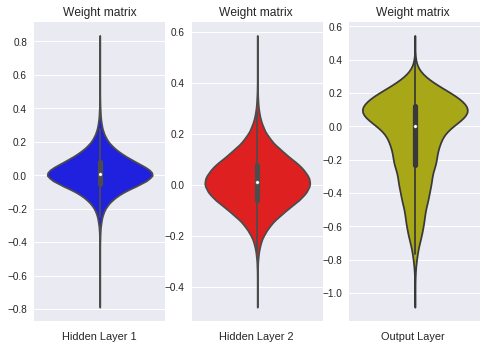

In [0]:
import seaborn as sns
h1_w = w['h1'].flatten().reshape(-1,1)
h2_w = w['h2'].flatten().reshape(-1,1)
out_w = w['out'].flatten().reshape(-1,1)


fig = plt.figure()
plt.subplot(1, 3, 1)
plt.title("Weight matrix")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Weight matrix ")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Weight matrix ")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# MODEL 2

**Part 1: Data collection**

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


**Part 2: Defining the model**

**Defining layers**

In [0]:
n_hidden1 = 320
n_hidden2 = 160
n_hidden3 = 80
n_hidden4 = 40
n_hidden5 = 20
n_input = 784
n_classes = 10

**placeholder for input and output**

In [0]:
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])

keep_prob = tf.placeholder(tf.float32)
keep_prob_input = tf.placeholder(tf.float32)

**weights initialisation**

In [0]:
weights_relu = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden1],stddev=0.050, mean=0)),    
    'h2': tf.Variable(tf.random_normal([n_hidden1, n_hidden2],stddev=0.079, mean=0)),
    'h3': tf.Variable(tf.random_normal([n_hidden2, n_hidden3],stddev=0.111, mean=0)),
    'h4': tf.Variable(tf.random_normal([n_hidden3, n_hidden4],stddev=0.158, mean=0)),
    'h5': tf.Variable(tf.random_normal([n_hidden4, n_hidden5],stddev=0.223, mean=0)),
    'out': tf.Variable(tf.random_normal([n_hidden2, n_classes],stddev=0.25, mean=0))  
}

**biases initialisation**

In [0]:
biases = {
    "b1": tf.Variable(tf.random_normal(shape=[n_hidden1])),
    "b2": tf.Variable(tf.random_normal(shape=[n_hidden2])),
    "out": tf.Variable(tf.random_normal(shape=[n_classes]))
}

**Training parameters**

In [0]:
training_epochs = 15
learning_rate = 0.001
batch_size = 100
display_step = 1
epsilon = 1e-3

**Our model: 320-160-80-40-20**

In [0]:
def multi_layer_perceptron(x, weights, biases):
  
  layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
  
  batch_mean_1, batch_var_1 = tf.nn.moments(layer_1,[0])
  scale_1 = tf.Variable(tf.ones([n_hidden1]))
  beta_1 = tf.Variable(tf.zeros([n_hidden1]))
  layer_1 = tf.nn.batch_normalization(layer_1, batch_mean_1, batch_var_1, beta_1, scale_1, epsilon)
  layer_1 = tf.nn.sigmoid(layer_1)
  layer_1_drop = tf.nn.dropout(layer_1, keep_prob)
  
  layer_2 = tf.add(tf.matmul(layer_1_drop, weights['h2']), biases['b2'])
  
  batch_mean_2, batch_var_2 = tf.nn.moments(layer_2,[0])
  scale_2 = tf.Variable(tf.ones([n_hidden2]))
  beta_2 = tf.Variable(tf.zeros([n_hidden2]))
  layer_2 = tf.nn.batch_normalization(layer_2,batch_mean_2,batch_var_2,beta_2,scale_2,epsilon)
  layer_2 = tf.nn.sigmoid(layer_2)
  layer_2_drop = tf.nn.dropout(layer_2, keep_prob)
  
  out_layer = tf.add(tf.matmul(layer_2_drop, weights['out']), biases['out'])
  out_layer = tf.nn.sigmoid(out_layer)
  
  return out_layer

**Model - ADAM**

In [0]:
# %matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time

def plt_dynamic(x, y, y_1, ax, ticks,title, colors=['b']):
    ax.plot(x, y, 'b', label="Train Loss")
    ax.plot(x, y_1, 'r', label="Test Loss")
    if len(x)==1:
        plt.legend()
        plt.title(title)
    plt.yticks(ticks)
    fig.canvas.draw()

train_avg_cost 1.790287502028726
Epoch: 0001 train cost=1.790287502 test cost=1.781122728
train_avg_cost 1.6477837881174953
Epoch: 0002 train cost=1.647783788 test cost=1.641126477
train_avg_cost 1.611567121852529
Epoch: 0003 train cost=1.611567122 test cost=1.605712509
train_avg_cost 1.5919036728685545
Epoch: 0004 train cost=1.591903673 test cost=1.585599597
train_avg_cost 1.5772834381190213
Epoch: 0005 train cost=1.577283438 test cost=1.571762931
train_avg_cost 1.5653247711875222
Epoch: 0006 train cost=1.565324771 test cost=1.560982146
train_avg_cost 1.5557270856337113
Epoch: 0007 train cost=1.555727086 test cost=1.552502518
train_avg_cost 1.5484033643115653
Epoch: 0008 train cost=1.548403364 test cost=1.545994174
train_avg_cost 1.5421510932662283
Epoch: 0009 train cost=1.542151093 test cost=1.540279112
train_avg_cost 1.5367129863392208
Epoch: 0010 train cost=1.536712986 test cost=1.535453473
train_avg_cost 1.5316133878447802
Epoch: 0011 train cost=1.531613388 test cost=1.530942009
t

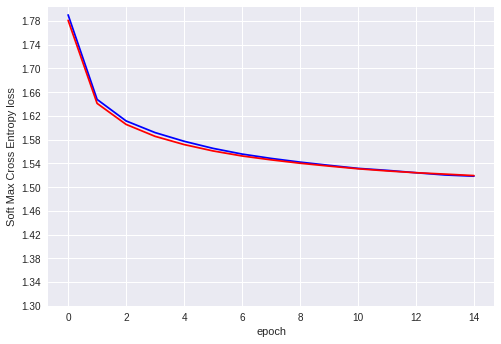

In [0]:
y_relu = multi_layer_perceptron(x, weights_relu, biases)
cost_sgd = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_relu, labels = y_))
optimizer_adam = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost_sgd)

with tf.Session() as sess:
  tf.global_variables_initializer().run()
  fig,ax = plt.subplots(1,1)
  ax.set_xlabel('epoch')
  ax.set_ylabel('Soft Max Cross Entropy loss')
  xs, ytrs, ytes = [], [], []
  for epoch in range(training_epochs):
      train_avg_cost = 0.
      test_avg_cost = 0.
      total_batch = int(mnist.train.num_examples/batch_size)

        # Loop over all batches
      for i in range(total_batch):
          batch_xs, batch_ys = mnist.train.next_batch(batch_size)
          _, c, w = sess.run([optimizer_adam, cost_sgd, weights_relu], feed_dict={x: batch_xs, y_: batch_ys, keep_prob: 0.5})
#           print('cost is ',c)
          train_avg_cost += c / total_batch
          c = sess.run(cost_sgd, feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_prob: 0.5})
          test_avg_cost += c / total_batch
      print('train_avg_cost',train_avg_cost)

      xs.append(epoch)
      ytrs.append(train_avg_cost)
      ytes.append(test_avg_cost)
#       plt_dynamic(xs, ytrs, ytes, ax, np.arange(1.3, 1.8, step=0.04), "input-sigmoid(1024)-sigmoid(512)-sigmoid(output)-AdamOptimizer")

      if epoch%display_step == 0:
          print("Epoch:", '%04d' % (epoch+1), "train cost={:.9f}".format(train_avg_cost), "test cost={:.9f}".format(test_avg_cost))
  plt_dynamic(xs, ytrs, ytes, ax, np.arange(1.3, 1.8, step=0.04), "input-sigmoid(1024)-sigmoid(512)-sigmoid(output)-AdamOptimizer")

  # we are calculating the final accuracy on the test data
  correct_prediction = tf.equal(tf.argmax(y_relu,1), tf.argmax(y_,1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
  print("Accuracy:", accuracy.eval({x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0},))

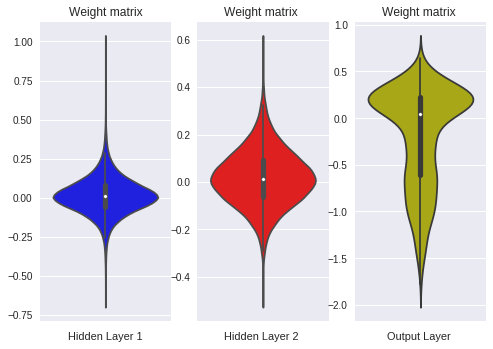

In [0]:
import seaborn as sns
h1_w = w['h1'].flatten().reshape(-1,1)
h2_w = w['h2'].flatten().reshape(-1,1)
out_w = w['out'].flatten().reshape(-1,1)


fig = plt.figure()
plt.subplot(1, 3, 1)
plt.title("Weight matrix")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Weight matrix ")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Weight matrix ")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# MODEL 3

**Part 2: Defining the model**

**Defining layers**

In [0]:
n_hidden1 = 279
n_hidden2 = 424
n_hidden3 = 160
n_input = 784
n_classes = 10

**placeholder for input and output**

In [0]:
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])

keep_prob = tf.placeholder(tf.float32)
keep_prob_input = tf.placeholder(tf.float32)

**weights initialisation**

In [0]:
weights_relu = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden1],stddev=0.050, mean=0)),    
    'h2': tf.Variable(tf.random_normal([n_hidden1, n_hidden2],stddev=0.084, mean=0)),
    'h3': tf.Variable(tf.random_normal([n_hidden2, n_hidden3], stddev=0.068, mean=0)),
    'out': tf.Variable(tf.random_normal([n_hidden3, n_classes],stddev=0.108, mean=0))  
}

**biases initialisation**

In [0]:
biases = {
    "b1": tf.Variable(tf.random_normal(shape=[n_hidden1])),
    "b2": tf.Variable(tf.random_normal(shape=[n_hidden2])),
    "b3": tf.Variable(tf.random_normal(shape=[n_hidden3])),
    "out": tf.Variable(tf.random_normal(shape=[n_classes]))
}

**Training parameters**

In [0]:
training_epochs = 15
learning_rate = 0.001
batch_size = 100
display_step = 1
epsilon = 1e-3

**Our model: 784-279-424-160-10**

In [0]:
def multi_layer_perceptron(x, weights, biases):
  
  layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
  
  batch_mean_1, batch_var_1 = tf.nn.moments(layer_1,[0])
  scale_1 = tf.Variable(tf.ones([n_hidden1]))
  beta_1 = tf.Variable(tf.zeros([n_hidden1]))
  layer_1 = tf.nn.batch_normalization(layer_1, batch_mean_1, batch_var_1, beta_1, scale_1, epsilon)
  layer_1 = tf.nn.sigmoid(layer_1)
  layer_1_drop = tf.nn.dropout(layer_1, keep_prob)
  
  layer_2 = tf.add(tf.matmul(layer_1_drop, weights['h2']), biases['b2'])
  
  batch_mean_2, batch_var_2 = tf.nn.moments(layer_2,[0])
  scale_2 = tf.Variable(tf.ones([n_hidden2]))
  beta_2 = tf.Variable(tf.zeros([n_hidden2]))
  layer_2 = tf.nn.batch_normalization(layer_2,batch_mean_2,batch_var_2,beta_2,scale_2,epsilon)
  layer_2 = tf.nn.sigmoid(layer_2)
  layer_2_drop = tf.nn.dropout(layer_2, keep_prob)
  
  layer_3 = tf.add(tf.matmul(layer_2_drop, weights['h3']), biases['b3'])
  
  batch_mean_3, batch_var_3 = tf.nn.moments(layer_3,[0])
  scale_3 = tf.Variable(tf.ones([n_hidden3]))
  beta_3 = tf.Variable(tf.zeros([n_hidden3]))
  layer_3 = tf.nn.batch_normalization(layer_3,batch_mean_3,batch_var_3,beta_3,scale_3,epsilon)
  layer_3 = tf.nn.sigmoid(layer_3)
  
  out_layer = tf.add(tf.matmul(layer_3, weights['out']), biases['out'])
  out_layer = tf.nn.sigmoid(out_layer)
  
  return out_layer

In [0]:
# %matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time

def plt_dynamic(x, y, y_1, ax, ticks,title, colors=['b']):
    ax.plot(x, y, 'b', label="Train Loss")
    ax.plot(x, y_1, 'r', label="Test Loss")
    if len(x)==1:
        plt.legend()
        plt.title(title)
    plt.yticks(ticks)
    fig.canvas.draw()

train_avg_cost 1.8056624525243585
Epoch: 0001 train cost=1.805662453 test cost=1.798165752
train_avg_cost 1.6303321389718486
Epoch: 0002 train cost=1.630332139 test cost=1.623343707
train_avg_cost 1.5899573183059692
Epoch: 0003 train cost=1.589957318 test cost=1.583571143
train_avg_cost 1.5694473769448
Epoch: 0004 train cost=1.569447377 test cost=1.563316114
train_avg_cost 1.5551030024615204
Epoch: 0005 train cost=1.555103002 test cost=1.550386606
train_avg_cost 1.5448924443938512
Epoch: 0006 train cost=1.544892444 test cost=1.540691459
train_avg_cost 1.5366926828297705
Epoch: 0007 train cost=1.536692683 test cost=1.533882157
train_avg_cost 1.5304746636477393
Epoch: 0008 train cost=1.530474664 test cost=1.528252281
train_avg_cost 1.5252555441856384
Epoch: 0009 train cost=1.525255544 test cost=1.523768594
train_avg_cost 1.521023148189889
Epoch: 0010 train cost=1.521023148 test cost=1.519921487
train_avg_cost 1.5173541082035398
Epoch: 0011 train cost=1.517354108 test cost=1.516454459
tra

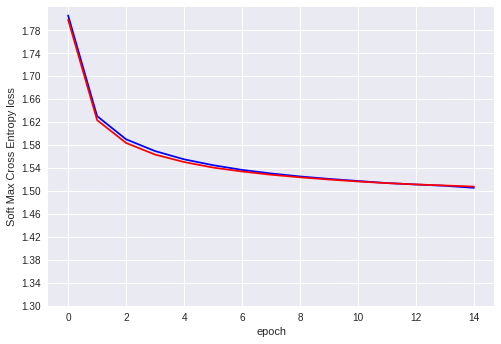

In [0]:
y_relu = multi_layer_perceptron(x, weights_relu, biases)
cost_sgd = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_relu, labels = y_))
optimizer_adam = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost_sgd)

with tf.Session() as sess:
  tf.global_variables_initializer().run()
  fig,ax = plt.subplots(1,1)
  ax.set_xlabel('epoch')
  ax.set_ylabel('Soft Max Cross Entropy loss')
  xs, ytrs, ytes = [], [], []
  for epoch in range(training_epochs):
      train_avg_cost = 0.
      test_avg_cost = 0.
      total_batch = int(mnist.train.num_examples/batch_size)

        # Loop over all batches
      for i in range(total_batch):
          batch_xs, batch_ys = mnist.train.next_batch(batch_size)
          _, c, w = sess.run([optimizer_adam, cost_sgd, weights_relu], feed_dict={x: batch_xs, y_: batch_ys, keep_prob: 0.5})
#           print('cost is ',c)
          train_avg_cost += c / total_batch
          c = sess.run(cost_sgd, feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_prob: 0.5})
          test_avg_cost += c / total_batch
      print('train_avg_cost',train_avg_cost)

      xs.append(epoch)
      ytrs.append(train_avg_cost)
      ytes.append(test_avg_cost)
#       plt_dynamic(xs, ytrs, ytes, ax, np.arange(1.3, 1.8, step=0.04), "input-sigmoid(1024)-sigmoid(512)-sigmoid(output)-AdamOptimizer")

      if epoch%display_step == 0:
          print("Epoch:", '%04d' % (epoch+1), "train cost={:.9f}".format(train_avg_cost), "test cost={:.9f}".format(test_avg_cost))
  plt_dynamic(xs, ytrs, ytes, ax, np.arange(1.3, 1.8, step=0.04), "input-sigmoid(1024)-sigmoid(512)-sigmoid(output)-AdamOptimizer")

  # we are calculating the final accuracy on the test data
  correct_prediction = tf.equal(tf.argmax(y_relu,1), tf.argmax(y_,1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
  print("Accuracy:", accuracy.eval({x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0},))

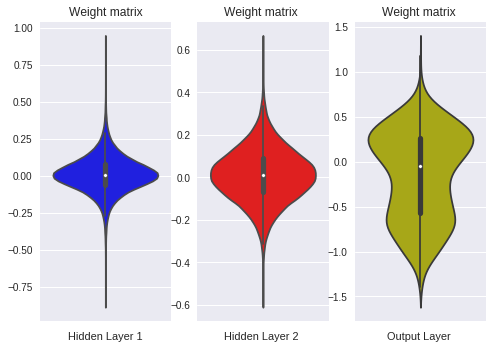

In [0]:
import seaborn as sns
h1_w = w['h1'].flatten().reshape(-1,1)
h2_w = w['h2'].flatten().reshape(-1,1)
out_w = w['out'].flatten().reshape(-1,1)


fig = plt.figure()
plt.subplot(1, 3, 1)
plt.title("Weight matrix")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Weight matrix ")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Weight matrix ")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

In [0]:
from prettytable import PrettyTable

In [0]:
x = PrettyTable()

In [0]:
x.field_names = ['S.no', 'model','epochs', 'training_cost', 'testing_cost','accuracy']

In [0]:
x.add_row(['1','784-1024-512-10','15','1.50','1.50', '96.35'])
x.add_row(['2','784-320-160-80-40-20-10','15','1.51','1.51','95.94'])
x.add_row(['3','784-279-424-160-10','15','1.50','1.50','96.52'])

In [0]:
print(x)

+------+-------------------------+--------+---------------+--------------+----------+
| S.no |          model          | epochs | training_cost | testing_cost | accuracy |
+------+-------------------------+--------+---------------+--------------+----------+
|  1   |     784-1024-512-10     |   15   |      1.50     |     1.50     |  96.35   |
|  2   | 784-320-160-80-40-20-10 |   15   |      1.51     |     1.51     |  95.94   |
|  3   |    784-279-424-160-10   |   15   |      1.50     |     1.50     |  96.52   |
+------+-------------------------+--------+---------------+--------------+----------+


## End of assignment

# Extras

# KERAS IMPLEMENTATION

# KERAS MODEL 1

In [0]:
import keras
from keras.datasets import mnist
import tensorflow as tf

Using TensorFlow backend.


In [0]:
num_classes = 10
num_epochs = 1
batch_size = 20

In [0]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [0]:
x_test /= 255.0
x_train /= 255.0
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Flatten, MaxPool2D, Dropout, BatchNormalization

In [0]:
model = Sequential()
model.add(Dense(784, activation='relu' ,input_shape = (784,)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(optimizer=keras.optimizers. loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

TypeError: ignored

In [0]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 28s 470us/step - loss: 0.2232 - acc: 0.9345 - val_loss: 0.1174 - val_acc: 0.9686
Epoch 2/10
60000/60000 [==============================] - 25s 423us/step - loss: 0.1144 - acc: 0.9687 - val_loss: 0.1113 - val_acc: 0.9689
Epoch 3/10
60000/60000 [==============================] - 25s 422us/step - loss: 0.0848 - acc: 0.9765 - val_loss: 0.0956 - val_acc: 0.9740
Epoch 4/10
60000/60000 [==============================] - 25s 417us/step - loss: 0.0663 - acc: 0.9818 - val_loss: 0.1008 - val_acc: 0.9759
Epoch 5/10
60000/60000 [==============================] - 25s 416us/step - loss: 0.0575 - acc: 0.9841 - val_loss: 0.0934 - val_acc: 0.9781
Epoch 6/10
60000/60000 [==============================] - 25s 417us/step - loss: 0.0512 - acc: 0.9863 - val_loss: 0.1196 - val_acc: 0.9732
Epoch 7/10
60000/60000 [==============================] - 25s 417us/

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 2,011,034
Trainable params: 2,011,034
Non-trainable params: 0
_________________________________________________________________


In [0]:
from keras.utils import plot_model
import matplotlib.pyplot as plt

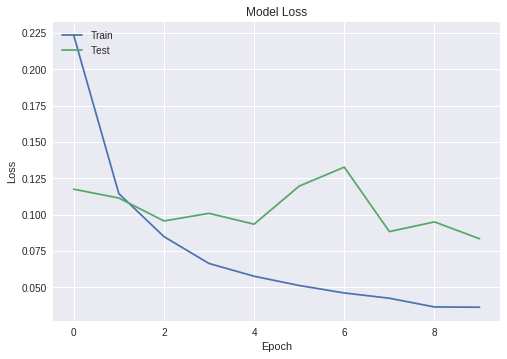

In [0]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
from keras.datasets import mnist

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 2,011,034
Trainable params: 2,011,034
Non-trainable params: 0
_________________________________________________________________


In [0]:
import numpy as np

In [0]:
mat_x_test = np.asmatrix(x_test)

In [0]:
mat_x_test[0].shape

(1, 784)

In [0]:
mat_y_test = np.asmatrix(y_test)

In [0]:
model.evaluate(x=mat_x_test, y=mat_y_test)

10000/10000 [==============================] - 1s 61us/step


[0.08331480011504941, 0.9809]

# KERAS MODEL 2

In [0]:
model = Sequential()
model.add(Dense(784, activation='relu' ,input_shape = (784,)))
model.add(Dense(684, activation='relu'))
model.add(Dense(424, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [0]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 29s 491us/step - loss: 0.4200 - acc: 0.9100 - val_loss: 0.2464 - val_acc: 0.9467
Epoch 2/10
60000/60000 [==============================] - 29s 476us/step - loss: 0.1488 - acc: 0.9655 - val_loss: 0.1193 - val_acc: 0.9709
Epoch 3/10
60000/60000 [==============================] - 29s 475us/step - loss: 0.0989 - acc: 0.9760 - val_loss: 0.1002 - val_acc: 0.9770
Epoch 4/10
60000/60000 [==============================] - 29s 476us/step - loss: 0.0770 - acc: 0.9802 - val_loss: 0.0950 - val_acc: 0.9786
Epoch 5/10
60000/60000 [==============================] - 28s 475us/step - loss: 0.0649 - acc: 0.9839 - val_loss: 0.0977 - val_acc: 0.9762
Epoch 6/10
60000/60000 [==============================] - 29s 476us/step - loss: 0.0544 - acc: 0.9864 - val_loss: 0.1008 - val_acc: 0.9784
Epoch 7/10
60000/60000 [==============================] - 29s 476us/step - loss: 0.0486 - acc: 0.9874 - val_loss: 0.

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_7 (Dense)              (None, 684)               536940    
_________________________________________________________________
dense_8 (Dense)              (None, 424)               290440    
_________________________________________________________________
dense_9 (Dense)              (None, 128)               54400     
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_11 (Dense)             (None, 6)                 390       
_________________________________________________________________
dense_12 (Dense)             (None, 10)                70        
Total para

In [0]:
from keras.utils import plot_model

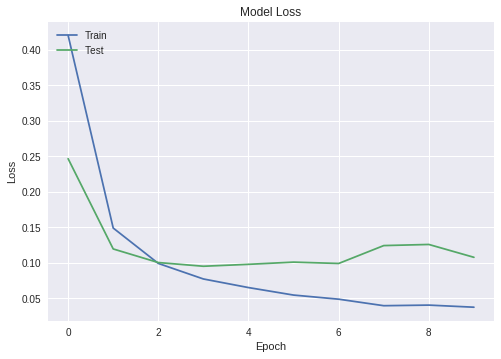

In [0]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
model.evaluate(x=mat_x_test, y=mat_y_test)

10000/10000 [==============================] - 1s 68us/step


[2.305492371368408, 0.0855]

# KERAS MODEL 3

In [0]:
model = Sequential()
model.add(Dense(784, activation='relu' ,input_shape = (784,)))
model.add(Dense(45, activation='relu'))
model.add(Dense(85, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [0]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 18s 305us/step - loss: 0.1375 - acc: 0.9586 - val_loss: 0.0936 - val_acc: 0.9715
Epoch 2/10
60000/60000 [==============================] - 18s 306us/step - loss: 0.0818 - acc: 0.9743 - val_loss: 0.1031 - val_acc: 0.9688
Epoch 3/10
60000/60000 [==============================] - 18s 306us/step - loss: 0.0582 - acc: 0.9813 - val_loss: 0.0821 - val_acc: 0.9769
Epoch 4/10
60000/60000 [==============================] - 18s 306us/step - loss: 0.0469 - acc: 0.9859 - val_loss: 0.0736 - val_acc: 0.9793
Epoch 5/10
60000/60000 [==============================] - 18s 304us/step - loss: 0.0386 - acc: 0.9875 - val_loss: 0.0981 - val_acc: 0.9758
Epoch 6/10
60000/60000 [==============================] - 18s 304us/step - loss: 0.0310 - acc: 0.9898 - val_loss: 0.0899 - val_acc: 0.9784
Epoch 7/10
60000/60000 [==============================] - 18s 305us/step - loss: 0.0273 - acc: 0.9915 - val_loss: 0.

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_14 (Dense)             (None, 45)                35325     
_________________________________________________________________
dense_15 (Dense)             (None, 85)                3910      
_________________________________________________________________
dense_16 (Dense)             (None, 10)                860       
Total params: 655,535
Trainable params: 655,535
Non-trainable params: 0
_________________________________________________________________


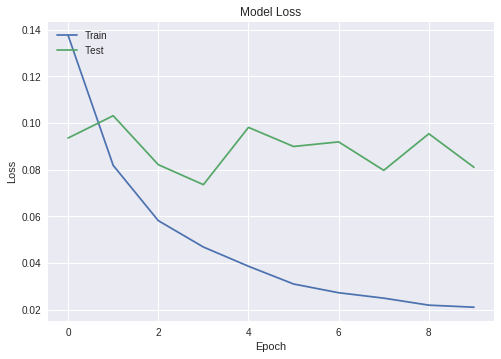

In [0]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
model.evaluate(x=mat_x_test, y=mat_y_test)

10000/10000 [==============================] - 1s 54us/step


[0.08103715774358243, 0.9819]